# Data Visualization Exercise: US Airline Flight Fares

In this excercise we're taking a dataset with different arline flights features, our objetive will be explore this dataset, produce some visualizations that add value to the analysis and then implement a prediction model that suit this case.

## References
The dataset was took from Kaggel portal, you can find the orginal post in the following link:
- https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024

\* please keep in mind dataset was taken from other post but the aproch and analysis is comming from myself.

### Dataset decription

#### Features:
- tbl: Table identifier
- Year: Year of the data record
- quarter: Quarter of the year (1-4)
- citymarketid_1: Origin city market ID
- citymarketid_2: Destination city market ID
- city1: Origin city name
- city2: Destination city name
- airportid_1: Origin airport ID
- airportid_2: Destination airport ID
- airport_1: Origin airport code
- airport_2: Destination airport code
- nsmiles: Distance between airports in miles
- passengers: Number of passengers
- fare: Average fare
- carrier_lg: Code for the largest carrier by passengers
- large_ms: Market share of the largest carrier
- fare_lg: Average fare of the largest carrier
- carrier_low: Code for the lowest fare carrier
- lf_ms: Market share of the lowest fare carrier
- fare_low: Lowest fare
- Geocoded_City1: Geocoded coordinates for the origin city
- Geocoded_City2: Geocoded coordinates for the destination city
- tbl1apk: Unique identifier for the route


In [30]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
Raw_DataSet = pd.read_csv('./US Airline Flight Routes and Fares 1993-2024.csv',low_memory=False)

In [14]:
Raw_DataSet.dtypes

tbl                object
Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
airportid_1         int64
airportid_2         int64
airport_1          object
airport_2          object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
Geocoded_City1     object
Geocoded_City2     object
tbl1apk            object
dtype: object

In [8]:
Raw_DataSet.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


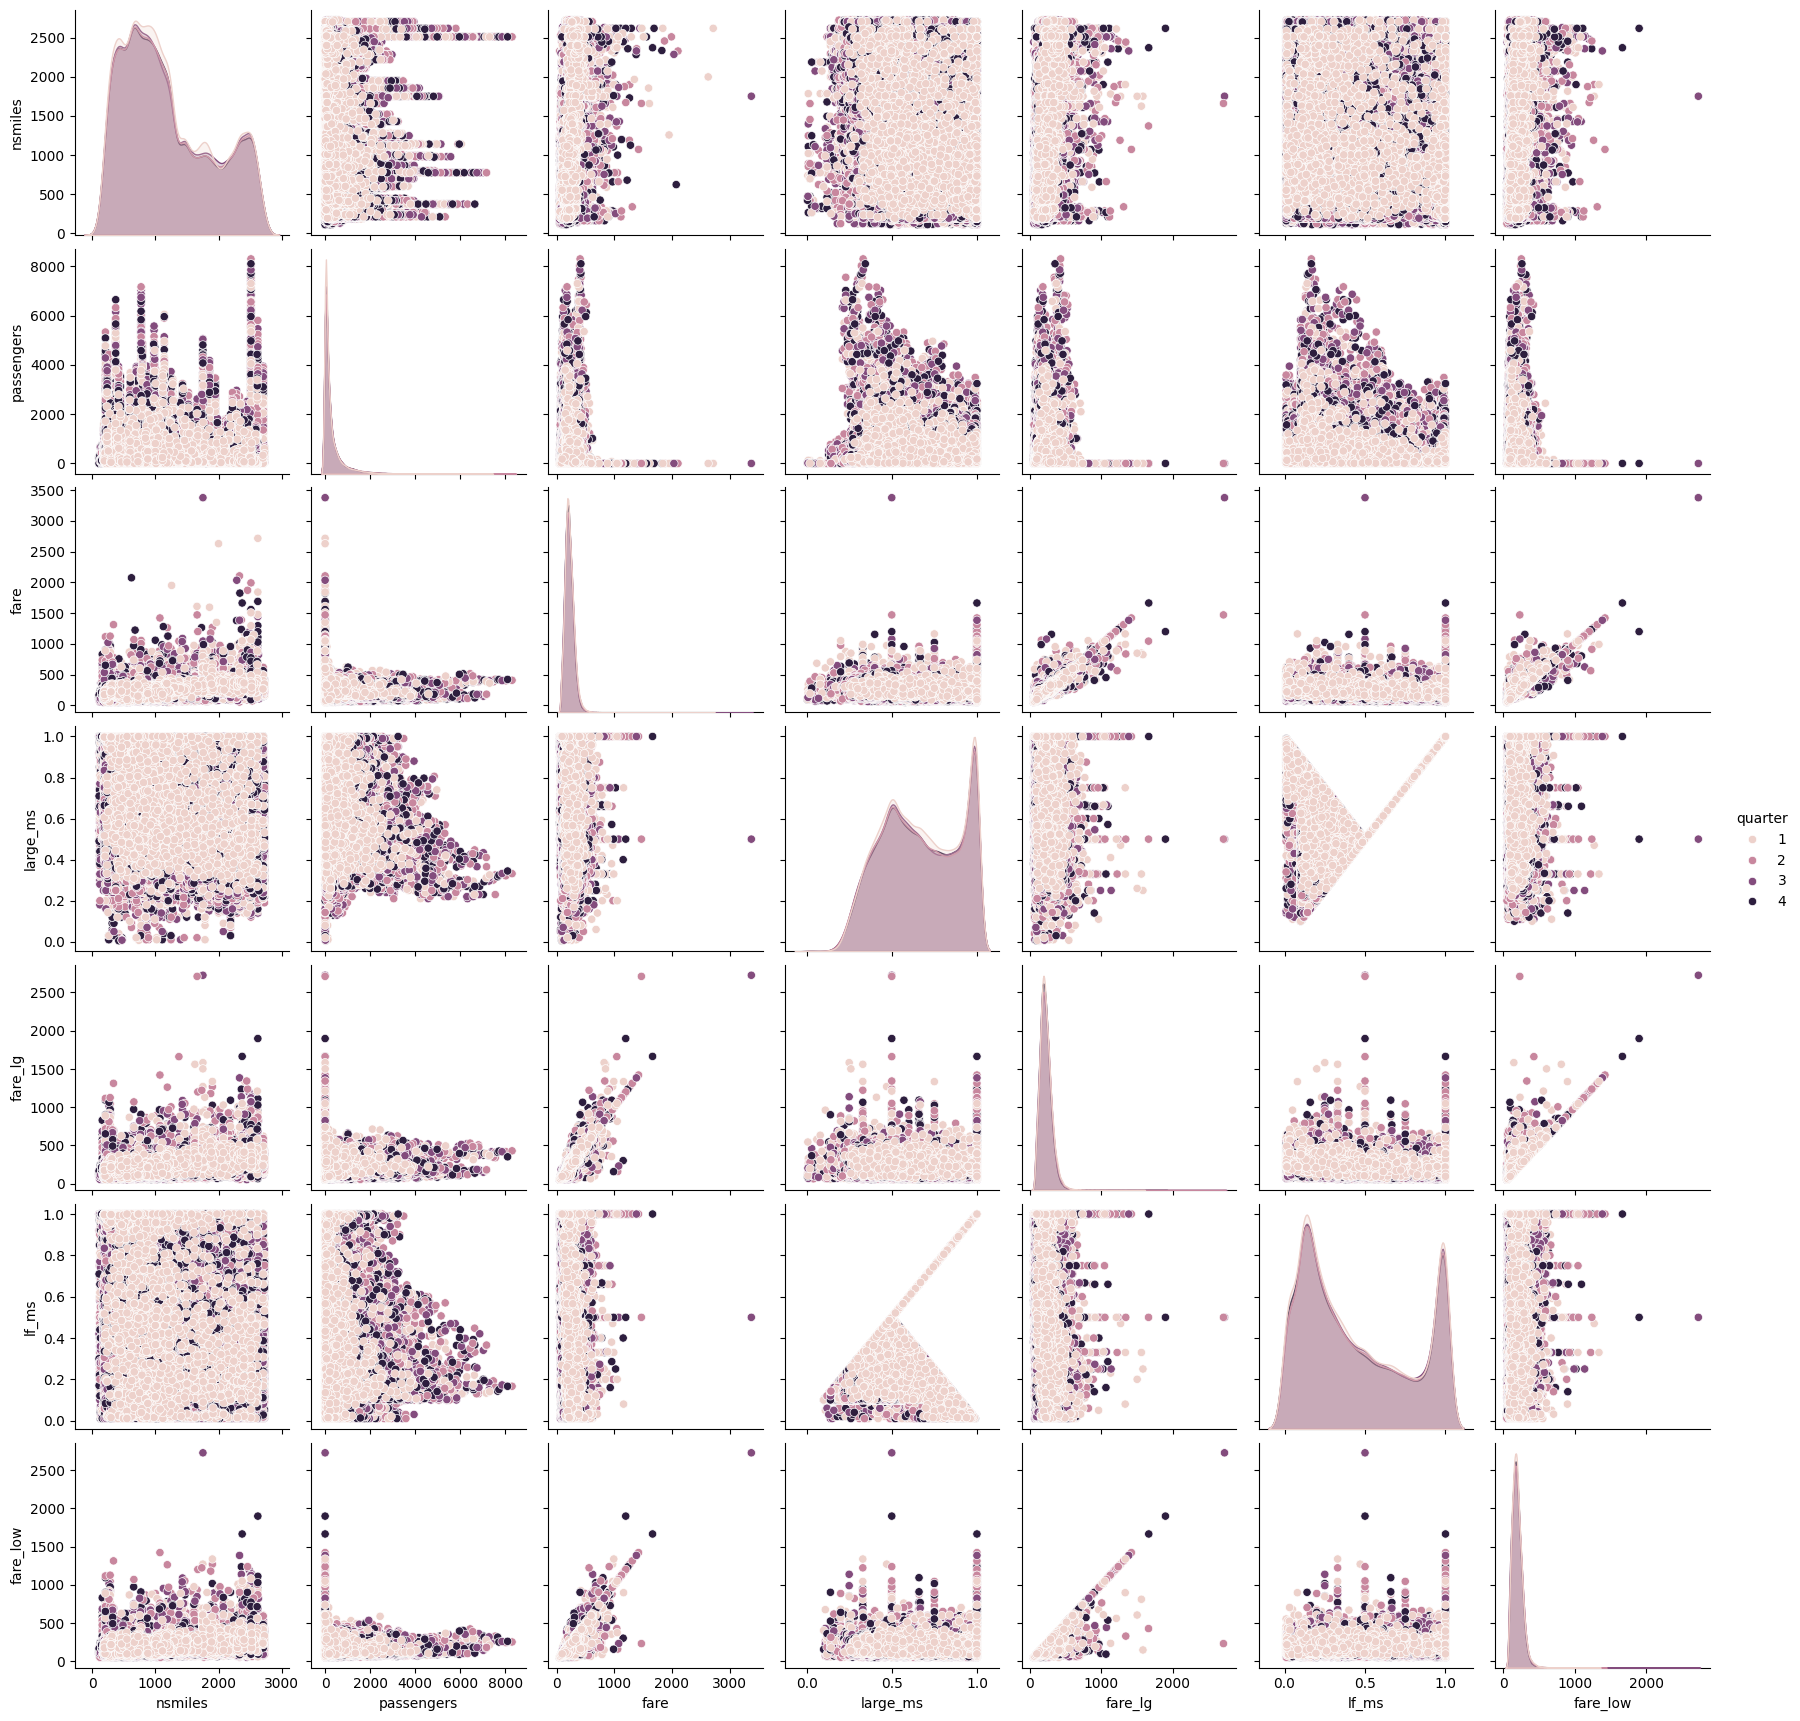

In [26]:
#["nsmiles", "passengers", "fare", "large_ms", "fare_lg", "lf_ms", "fare_low"]

Numeric_Dataset = Raw_DataSet.loc[:,["quarter", "nsmiles", "passengers", "fare", "large_ms", "fare_lg", "lf_ms", "fare_low"]]

sns.pairplot(Numeric_Dataset, hue="quarter")

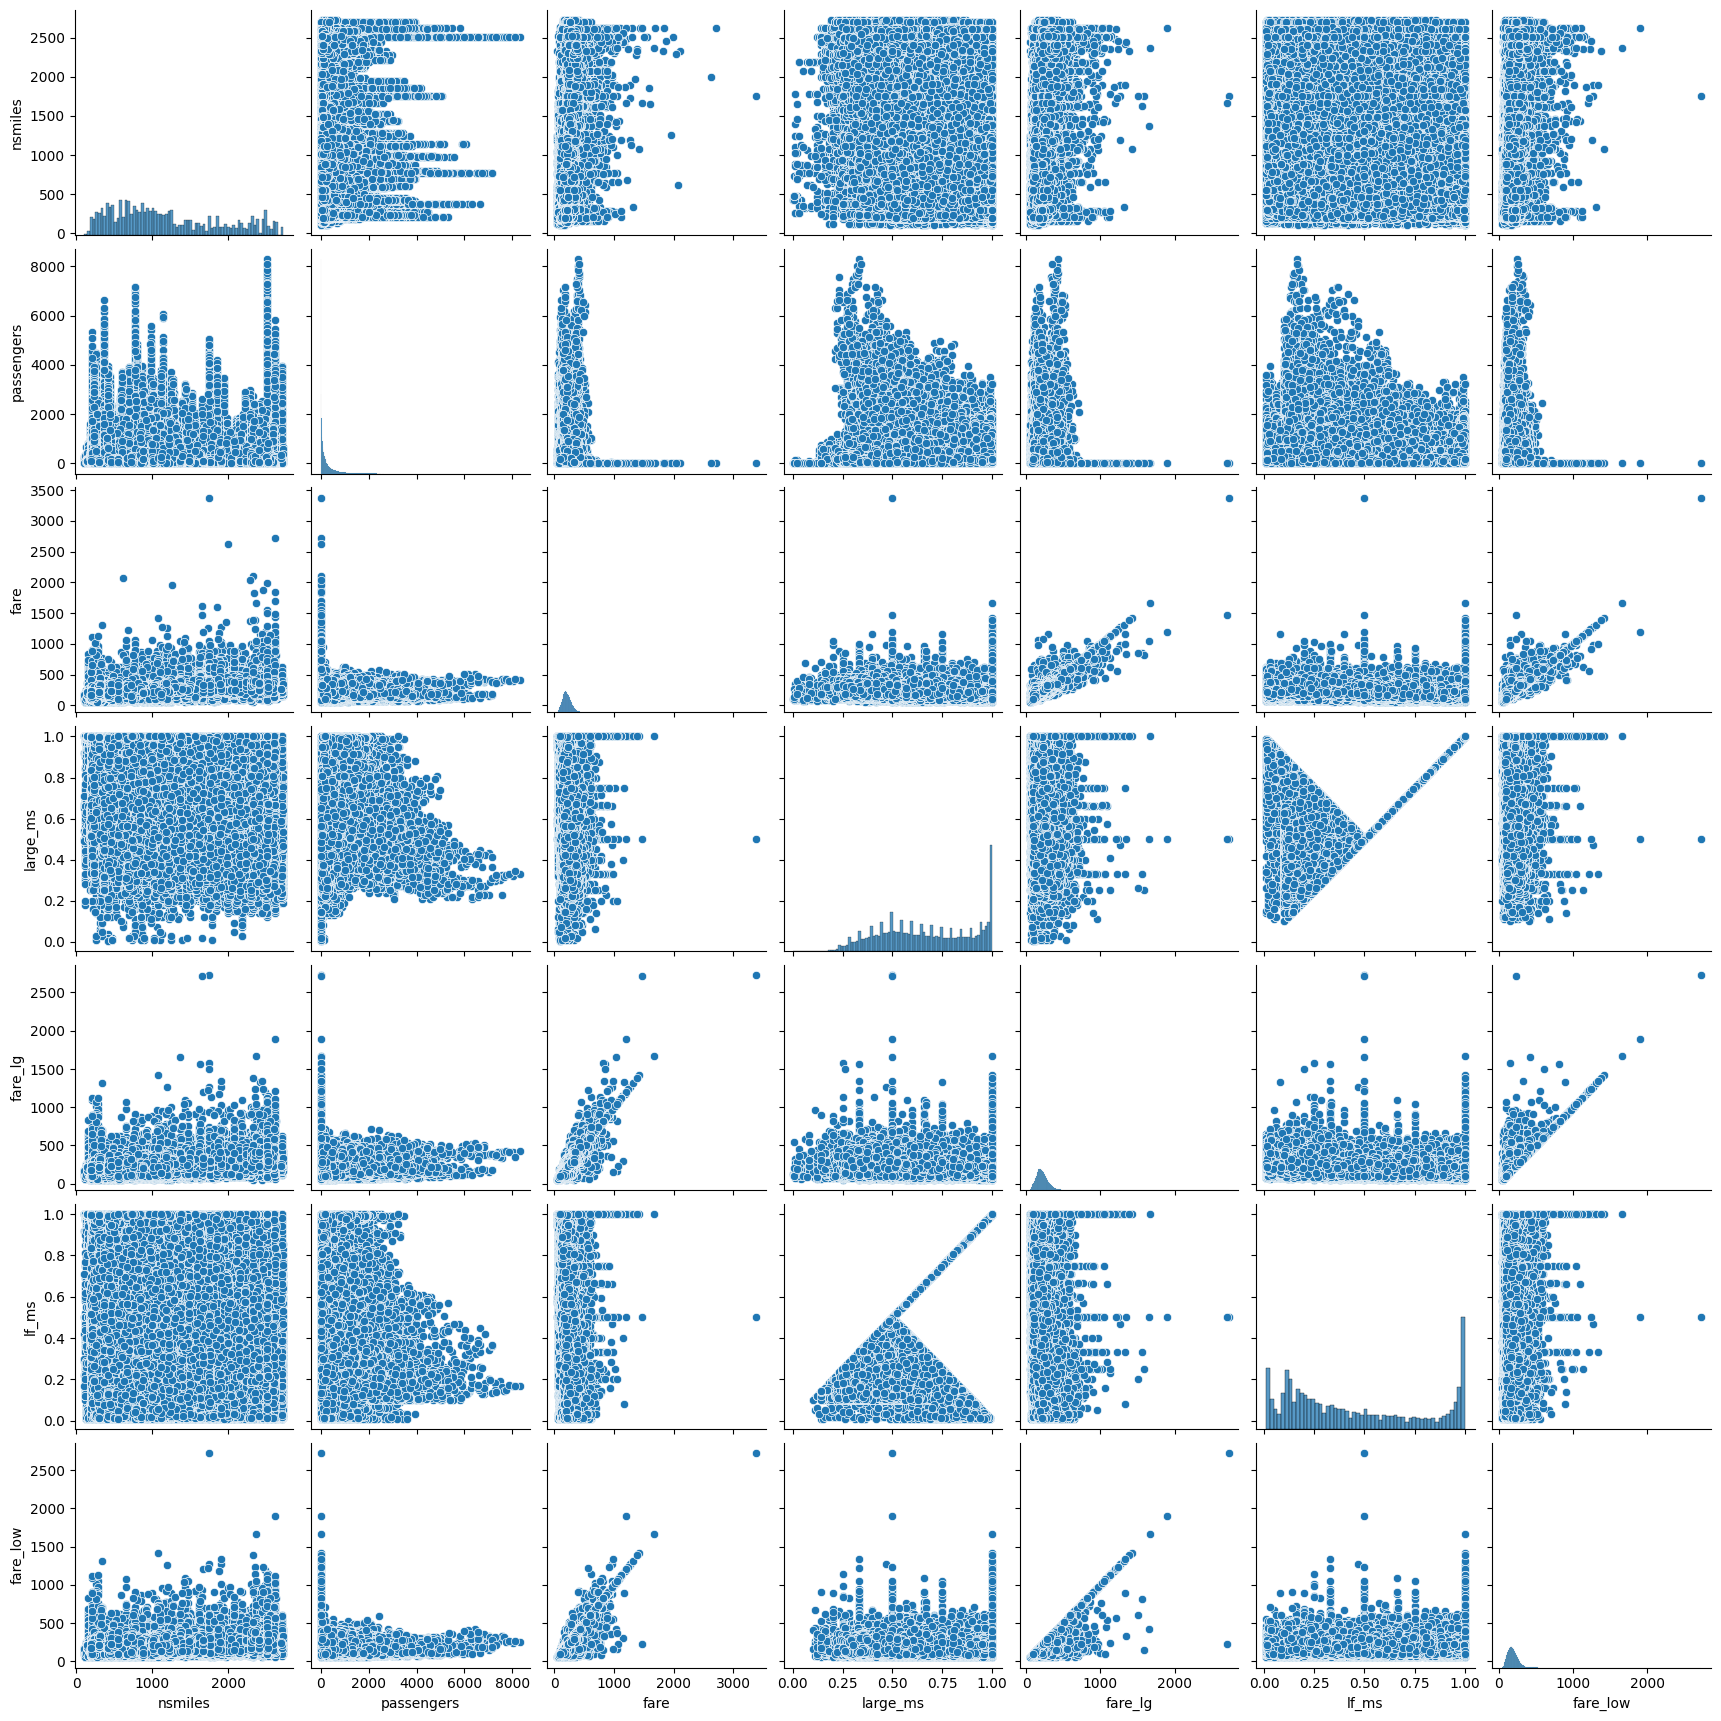

In [27]:
Numeric_Dataset = Raw_DataSet.loc[:,["nsmiles", "passengers", "fare", "large_ms", "fare_lg", "lf_ms", "fare_low"]]

sns.pairplot(Numeric_Dataset)

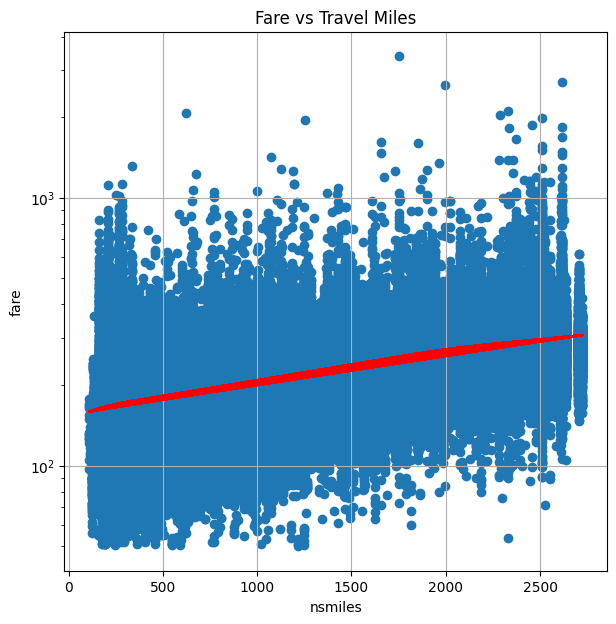

In [48]:
# distribución del precio y el área de construcción.
# Observe los datos atípicos

def plot_data(df, col_x, col_y, label_x, label_y, val_title, fitline = 0):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    ax = plt.gca()
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.grid()
    ax.set_yscale('log')
    if fitline > 0:
        z = np.polyfit(df[col_x], df[col_y], fitline)
        p = np.poly1d(z)
        plt.plot(df[col_x], p(df[col_x]), "r")
    plt.show()
    
plot_data(Raw_DataSet, col_x = 'nsmiles', col_y = 'fare', label_x = 'nsmiles', label_y = 'fare',
          val_title = 'Fare vs Travel Miles', fitline = 5)